## Correlation plot


In [1]:
# KHOA NOTE: Remove #4
usedSubjects=[1,2,3,4,5,6,7,8,9,10,11,12,13,16,19,20]
subjectID=10
subjectID=subjectID-1

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.io



def readCSV(fileName):
    res=np.array(pd.read_csv(fileName,header=None,delimiter='\t'))
    return res

def readTXT(fileName):
    res=np.array(pd.read_csv(fileName,header=None,delimiter='\t'))
    return res

noSubjectNum=0
# for i in range(noSubjectNum):
i=subjectID
Fn=f"OK00{i+1}" if i < 9 else f"OK0{i+1}"
print(Fn)


GaitPodFn=Fn+"_vel_imu.mat"
HRFn=Fn+"_HR.csv"
oxygenFn=Fn+"_Oxycon.txt"
print(GaitPodFn)


HR_dir="HR data/"
oxygen_dir="OxyCon data/"
gaitpod_dir="GaitPod data/"


HRFn=HR_dir+HRFn
oxygenFn=oxygen_dir+oxygenFn
GaitPodFn=gaitpod_dir+GaitPodFn

OK010
OK010_vel_imu.mat


## Define cutoff time

In [3]:
# -1 cutoff time means NaN
# cut-off times based on measurement memos (in seconds)
subj1_slice=80
# +subj1_slice+325
# +subj1_slice
GaitPod_CutOff_Times = [565, 358, 318, 672, 700, 660, 594, 280, 533, 365, 474, 1549, 530, -1, -1, 387, -1, -1, 375, 350];
# cut-off times based on cross-correlation of normalized VO2 and HR data (in seconds)
HR_CutOff_Times = [519, 530, 409, 505, 450, 502, 490, 430, 528, 546, 365, 712, 401, -1, -1, 390, -1, -1, 387, 410];

## CUTOFF FOR SUBJECT 1
sliceIdx1=200
sliceIdx2=370
sliceIdx3=559
sliceIdx4=750

## Define resampling time 

In [4]:
# Sampling time for heart rate (in seconds)
HR_sampling_time=5

# Sampling time for oxygen (in seconds)
Oxygen_sampling_time=5

# Sampling time for gaitpod (in seconds)
GaitPod_sampling_time=5

## Oxygen processing

In [5]:
oxygen_data=np.array(np.squeeze(pd.read_csv(oxygenFn,header=6,delimiter='\t')))
oxygen_data_reconstruct=np.zeros(np.shape(oxygen_data))

# Define a custom function to convert string with comma to float
iter = 1

def check_duplicates(arr):
    unique_values, counts = np.unique(arr,return_counts=1)
    duplicated_vaules = unique_values[counts>1]
#     print(duplicated_vaules)
    for duplicate in duplicated_vaules:
        indices = np.where(arr == duplicate)[0]
        print(f"Element {duplicate} is duplicated at indices: {indices.tolist()}")

def comma_to_float(string):
    string=str(string)
    if len(string) == 0 or '-' in string or '#' in string:
        return -100
    # Replace comma with dot and convert to float
    if ',' in string:
        return np.float32(string.replace(',', '.'))
    else:
        return np.float32(string)

def remove_outline(array,outline_threshold):
    for i,row in enumerate(array):
        if row[1]>outline_threshold:
            print(f"Delete outline at it {i}")
            np.delete(array,i,0)
    return array

oxygen_data_reconstruct=np.zeros(np.shape(oxygen_data))
iter=0

for row in oxygen_data:
    oxygen_data_reconstruct[iter][0]=row[0]
    oxygen_data_reconstruct[iter][1]=comma_to_float(row[1])
    iter+=1
    
oxygen_data_reconstruct=np.array(oxygen_data_reconstruct)

##=========== READY TO PLOT
# fig, ax1 = plt.subplots(figsize=(10, 6))
# ax2 = ax1.twinx()

# ax1.plot(oxygen_data_reconstruct[:,0])
# ax2=ax1.twinx()
# ax2.plot(oxygen_data_reconstruct[:,1])


## =============? REMOVE OUTLINE
outline_threshold=200
for i,row in enumerate(oxygen_data_reconstruct):
    if row[1]>outline_threshold:
#         print(f"Delete outline at it {i}")
        oxygen_data_reconstruct=np.delete(oxygen_data_reconstruct,i,0)

# ## REMOVE MISSING DATA
mask=oxygen_data_reconstruct[:, 1] >= 0
oxygen_data_reconstruct=oxygen_data_reconstruct[mask]


## OXYGEN IS RECORDED AT AVERAGE OF 3 seconds, 
## INTERPOLATE AT 5 SECONDS
timestamps=oxygen_data_reconstruct[:,0]


## ========== SHIFT TIME FOR SUBJECT 1 FOR CONTINUOUS MEASUREMENT (NO NEED)
# if subjectID==0:
#     slicingIndex=[]
#     timeShiftThreshold=200
#     timeStampSeries=pd.Series(timestamps)       
#     timeOutlinePoints=np.where(np.diff(timeStampSeries)>timeShiftThreshold)[0]
    
#     print(timeOutlinePoints)
#     slicingIndex=timeOutlinePoints
#     # Compensating time shift (in seconds)
#     timeShift1=431
#     timeShift2=940
#     timeStampSeries[timeOutlinePoints[0]+1:timeOutlinePoints[1]] = timeStampSeries[timeOutlinePoints[0]+1:timeOutlinePoints[1]] - timeShift1
#     timeStampSeries[timeOutlinePoints[1]]=timeStampSeries[timeOutlinePoints[1]]-timeShift1
#     timeStampSeries[timeOutlinePoints[1]+1:] = timeStampSeries[timeOutlinePoints[1]+1:]-timeShift2-timeShift1
#     oxygen_data_reconstruct[:,0]=timeStampSeries

timestamps=oxygen_data_reconstruct[:,0]
    
firstSec=timestamps[0]
lastSec=timestamps[-1]

oxygenResamplingIdx = np.arange(firstSec, lastSec, Oxygen_sampling_time)
oxygen_sampling=np.interp(oxygenResamplingIdx,timestamps,oxygen_data_reconstruct[:,1])

## ===== FOR SUBJECT 2, REMOVE NAN AND ZERO ENTRIES
reconstruct_index=[]
if subjectID==1:
    for i,data in enumerate(oxygen_sampling):
        if data < 1:
            reconstruct_index.append(i)
    print(reconstruct_index)
    oxygen_sampling = [value for index,value in enumerate(oxygen_sampling) if index not in reconstruct_index]


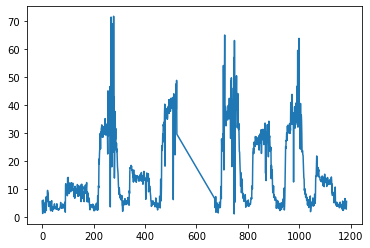

In [6]:
## Subject 1 slice data into 3 series from time shift index [ 351 1001]

plt.plot(oxygen_sampling)

## Heart rate processing


0
False
1
False
2
False
3
False
4
False
5
False
6
False
7
False
8
False
9
False
10
False
11
False
12
False
13
False
14
False
15
False
16
False
17
False
18
False
19
False
20
False
21
False
22
False
23
False
24
False
25
False
26
False
27
False
28
False
29
False
30
False
31
False
32
False
33
False
34
False
35
False
36
False
37
False
38
False
39
False
40
False
41
False
42
False
43
False
44
False
45
False
46
False
47
False
48
False
49
False
50
False
51
False
52
False
53
False
54
False
55
False
56
False
57
False
58
False
59
False
60
False
61
False
62
False
63
False
64
False
65
False
66
False
67
False
68
False
69
False
70
False
71
False
72
False
73
False
74
False
75
False
76
False
77
False
78
False
79
False
80
False
81
False
82
False
83
False
84
False
85
False
86
False
87
False
88
False
89
False
90
False
91
False
92
False
93
False
94
False
95
False
96
False
97
False
98
False
99
False
100
False
101
False
102
False
103
False
104
False
105
False
106
False
107
False
108
False
109
False
110
False


1130
False
1131
False
1132
False
1133
False
1134
False
1135
False
1136
False
1137
False
1138
False
1139
False
1140
False
1141
False
1142
False
1143
False
1144
False
1145
False
1146
False
1147
False
1148
False
1149
False
1150
False
1151
False
1152
False
1153
False
1154
False
1155
False
1156
False
1157
False
1158
False
1159
False
1160
False
1161
False
1162
False
1163
False
1164
False
1165
False
1166
False
1167
False
1168
False
1169
False
1170
False
1171
False
1172
False
1173
False
1174
False
1175
False
1176
False
1177
False
1178
False
1179
False
1180
False
1181
False
1182
False
1183
False
1184
False
1185
False
1186
False
1187
False
1188
False
1189
False
1190
False
1191
False
1192
False
1193
False
1194
False
1195
False
1196
False
1197
False
1198
False
1199
False
1200
False
1201
False
1202
False
1203
False
1204
False
1205
False
1206
False
1207
False
1208
False
1209
False
1210
False
1211
False
1212
False
1213
False
1214
False
1215
False
1216
False
1217
False
1218
False
1219
False
1220
False

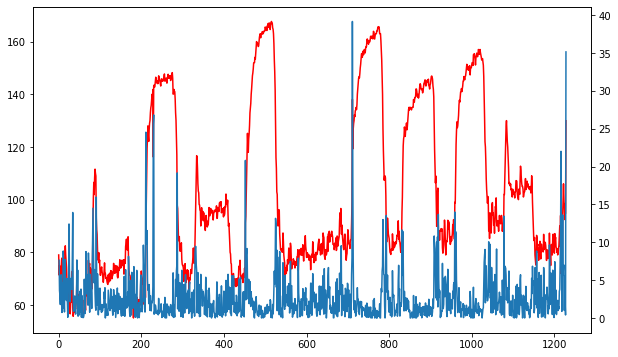

In [7]:
HR_CutOff_Time=HR_CutOff_Times[subjectID]
# print(HR_CutOff_Time)
HR_data=np.squeeze(readCSV(HRFn))
# HR_data=np.char.split(np.squeeze(readCSV(HRFn)),sep=";")
HR_data_stack=list()
for i in range(len(HR_data)):
    HR_data_tmp=HR_data[i].split(";")
#     print(HR_data_tmp)
    HR_data_stack.append(HR_data_tmp)
HR_data_stack=np.vstack(HR_data_stack)


## Remove HR data with len=0
arr_list=HR_data_stack.tolist()
HR_data_stack=[item for item in arr_list if len(item[0]) > 0 and len(item[1]) > 0]
HR_data_stack=np.array(HR_data_stack).astype(np.float32).squeeze()

HR_data_stack[:,0]=HR_data_stack[:,0]/1000


HRFirstEle=HR_data_stack[0,0]
HRLastEle=HR_data_stack[-1,0]
# print(HRFirstEle)
# print(HRLastEle)
HR_sampling_index=np.arange(HRFirstEle, HRLastEle, HR_sampling_time)

HR_sampling=np.interp(HR_sampling_index,HR_data_stack[:,0],HR_data_stack[:,1])

##=========== Cut off HR data
HR_sampling_cut=HR_sampling[HR_CutOff_Time:]

# plt.plot(HR_sampling_cut,'g')
HR_remove_index=[]
# print(HR_sampling_cut)

##=========== READY TO PLOT
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

##=========== CODE TO CLEAN DATA 
if subjectID in [1,9]:
    if subjectID==1:
        for idx,hr_data_tmp in enumerate(HR_sampling_cut):
            if hr_data_tmp < 70:
                HR_remove_index.append(idx)
        HR_sampling_cut=[value for index,value in enumerate(HR_sampling_cut) if index not in HR_remove_index ]

        HR_sampling_cut=np.array([value for index,value in enumerate(HR_sampling_cut) if index not in reconstruct_index])
    elif subjectID==9:
        pass
    
    # Detect outline data and record outline index
    data=pd.Series(HR_sampling_cut)
    HR_smooth=HR_sampling_cut.copy()

    ax1.plot(HR_sampling_cut,'r')
    threshold = 25

    plt.plot(np.abs(data.diff()))
    outliers=np.abs(data.diff())>threshold
    for i in(range(len(outliers))):
        pass
        print(i)
        print(outliers[i])

In [8]:
if subjectID==1:
    data[229:230] = data[578:585] = data[835:862] = data[953:962] = None

    data_interpolated=data.interpolate(method='polynomial',order=2)
    percentChangeData=data_interpolated.pct_change()
    rollingStd=percentChangeData.rolling(10).std()

    eps_values = np.random.uniform(0, 1, size=(230 - 229,))
    data_interpolated[229:230] = (rollingStd[228] * eps_values + 1) * data_interpolated[229:230]

    eps_values = np.random.uniform(0, 1, size=(585 - 578,))
    data_interpolated[578:585] = (rollingStd[577] * eps_values + 1) * data_interpolated[578:585]

    eps_values = np.random.uniform(0, 1, size=(862 - 835,))
    print(np.array(data_interpolated[835:862]))
    data_interpolated[835:862] = (rollingStd[834] * eps_values + 1) * data_interpolated[835:862]
    print(np.array(data_interpolated[835:862]))
    eps_values = np.random.uniform(0, 1, size=(962 - 953,))
    data_interpolated[953:962] = (rollingStd[952] * eps_values + 1) * data_interpolated[953:962]

    plt.plot(data_interpolated)
    
    HR_final=data_interpolated

    print(percentChangeData)
else:
    HR_final=HR_sampling_cut

In [9]:
# # for i in outliers.index:
# #     HR_smooth[i] = np.mean(data[i-10:i-5])

# p1, = ax1.plot(HR_smooth)
# data_smooth=pd.Series(HR_smooth)
# # print(data_smooth)
# ## TODO: ADD INTERPOLATE OR GET RID OF 959 960 961 962
# # plt.plot(np.abs(.diff()),'g')
# p2, = ax2.plot(np.abs(data_smooth.diff()))
# threshold_=19
# outliers_=np.abs(data_smooth.diff())>threshold_
# remove_index_=list()
# for i in range(len(outliers_)):
#     if outliers_[i]:
#         remove_index_.append(i)
# #         print(i)
# #         print(outliers_[i])

# # p1, = ax1.plot(data, 'r', label='v_lon_match')

# window_size=2
# z_list=[]
# # z_scores = data.rolling(window_size).apply(lambda x: np.abs((x - x.mean()) / x.std()))

## Gaitpod processing

False
False


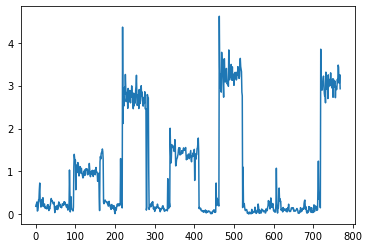

In [34]:
gaitpod_data = scipy.io.loadmat(GaitPodFn)

v_lon=gaitpod_data['V_lon']
v_d=gaitpod_data['v_d']

gaitpod_CutOff_Time=GaitPod_CutOff_Times[subjectID]
gp_new_idx=gaitpod_CutOff_Time*400


## ===== Remove NaN data from v_lon and v_d
if (np.isnan(v_d).any() or np.isnan(v_lon).any()):
    v_lon=v_lon[~np.isnan(v_lon)]
    v_d=v_d[~np.isnan(v_d)]

## ===== CUT OF GAITPOD DATA
v_lon=v_lon[gp_new_idx:,:]
v_d=v_d[gp_new_idx:,:]

N=len(v_lon)
idx=np.arange(0,N,400*GaitPod_sampling_time)

v_lon_match = pd.DataFrame(v_lon, index = None)
# print(len(v_lon_match))
v_lon_match = v_lon_match.rolling(400).mean()
# print(v_lon_match.loc[idx])
v_lon_match=v_lon_match.iloc[idx].values
# Remove first Nan
v_lon_match=v_lon_match[1:]

v_d_match = pd.DataFrame(v_d)
v_d_match = v_d_match.rolling(400).mean()
v_d_match=v_d_match.iloc[idx].values
v_d_match=v_d_match[1:]

print(np.isnan(v_lon_match).any())
print(np.isnan(v_d_match).any())
# print(v_lon_match[0:400])

plt.plot(v_lon_match)
if subjectID==1:
    v_lon_match=np.array([value for index,value in enumerate(v_lon_match) if index not in reconstruct_index])
    

In [11]:
# plt.plot(v_lon_match)
# plt.plot(v_d_match)

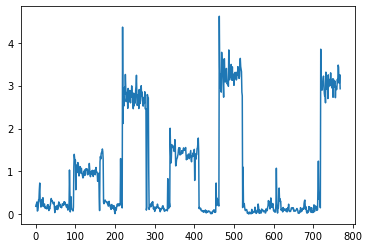

In [12]:
plt.plot(v_lon_match)
# plt.plot(oxygen_sampling)
# plt.plot(HR_sampling_cut)

In [49]:
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)
        
def plot_3_data(v_lon_match,HR_final,oxygen_sampling,saveFig=False,syncFigName="null.jpg"):

    fig, ax1 = plt.subplots(figsize=(10, 6))
    plt.title(f"Subject_{subjectID+1} Synchronization",size=20,loc="center",fontdict={'weight': 'bold'},y=1.05)


    ax2 = ax1.twinx()
    ax3 = ax1.twinx()


    ##============ PLOT 3 DATAS
    p1, = ax1.plot(v_lon_match, 'r', label='v_lon_match')
    p2, =ax2.plot(oxygen_sampling,'g',label='oxygen_sampling_5s')
    p3,=ax3.plot(HR_final, 'b', label='HR_sampling')


    ax1.set_xlabel('Index')
    ax1.set_ylabel('v_lon_match', color='r')
    ax1.yaxis.label.set_color(p1.get_color())

    # Create the second plot with secondary y-axis
    ax2.set_ylabel('oxygen_data_reconstruct[:, 1]', color='g')
    ax2.yaxis.label.set_color(p2.get_color())


    # Create the third plot with additional y-axis on the right side
    ax3.spines["right"].set_position(("axes", 1.2))
    make_patch_spines_invisible(ax3)
    ax3.spines["right"].set_visible(True)
    ax3.set_ylabel('Heart rate')
    ax3.yaxis.label.set_color(p3.get_color())
    ax3.yaxis.tick_right()
    ax3.yaxis.set_label_position('right')


    # Adjust spacing between subplots
    fig.tight_layout()

    tkw = dict(size=4, width=1.5)
    ax1.tick_params(axis='y',colors=p1.get_color(),**tkw)
    ax2.tick_params(axis='y',colors=p2.get_color(),**tkw)
    ax3.tick_params(axis='y',colors=p3.get_color(),**tkw)

    ax1.spines[['top']].set_visible(False)
    ax2.spines[['top']].set_visible(False)
    ax3.spines[['top']].set_visible(False)
    

    if saveFig:
        fig = plt.gcf()
        fig.set_size_inches(16, 12)
        syncFigName=plt.savefig(syncFigName)
    # Show the plot
    plt.show()


## SUBJECT1 - CUTOFF INTO 3 PARTS
if subjectID==0:
    v_lon_match_1 = v_lon_match[:sliceIdx1]
    HR_final_1 = HR_final[:sliceIdx1]
    oxygen_sampling_1=oxygen_sampling[:sliceIdx1]
    
    v_lon_match_2=v_lon_match[sliceIdx2:sliceIdx3]
    HR_final_2=HR_final[sliceIdx2:sliceIdx3]
    oxygen_sampling_2=oxygen_sampling[sliceIdx2:sliceIdx3]
    
    v_lon_match_3=v_lon_match[sliceIdx4:]
    HR_final_3=HR_final[sliceIdx4:]
    oxygen_sampling_3=oxygen_sampling[sliceIdx4:]
    
if subjectID==9:
    sliceIdx1_10=525
    sliceIdx2_10=700

    oxygen_sampling_1=oxygen_sampling[:sliceIdx1_10]
    v_lon_match_1 = v_lon_match[:sliceIdx1_10]
    HR_final_1 = HR_final[:sliceIdx1_10]
    
    v_lon_match_2=v_lon_match[sliceIdx2_10:]
    HR_final_2=HR_final[sliceIdx2_10:]
    oxygen_sampling_2=oxygen_sampling[sliceIdx2_10:]
#     plt.plot(oxygen_sampling_2)

In [14]:
# plot_3_data(v_lon_match,HR_final,oxygen_sampling)

769
1229
769


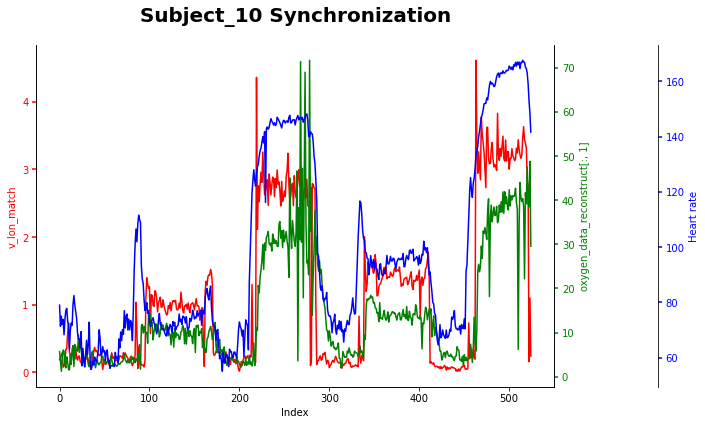

In [42]:
print(len(v_lon_match))
print(len(HR_final))
print(len(oxygen_sampling))
## Subject 1 slice data into 3 series from time shift index [ 351 1001]

if subjectID in [0,9]:
    plot_3_data(v_lon_match_1,HR_final_1,oxygen_sampling_1)

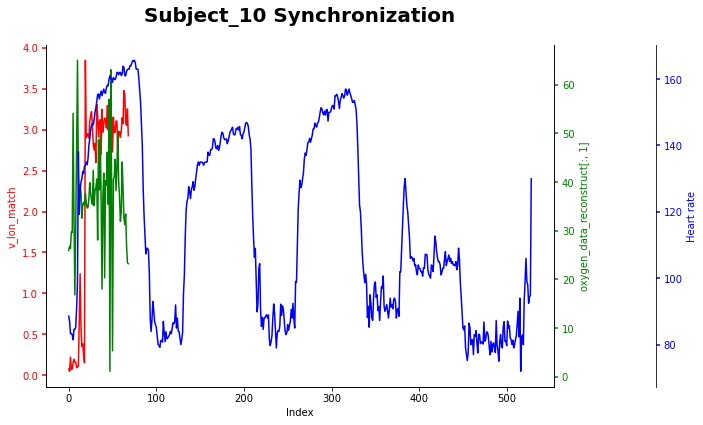

In [52]:
if subjectID in [0,9]:
    plot_3_data(v_lon_match_2,HR_final_2,oxygen_sampling_2)

In [38]:
if subjectID==0:
    plot_3_data(v_lon_match_3,HR_final_3,oxygen_sampling_3)

## Calculate correlation

In [18]:
figCorrName=f"Subject_{subjectID+1}_corr.jpg"
print(figCorrName)

figSyncName=f"Subject_{subjectID+1}_sync.jpg"
print(figSyncName)

Subject_10_corr.jpg
Subject_10_sync.jpg


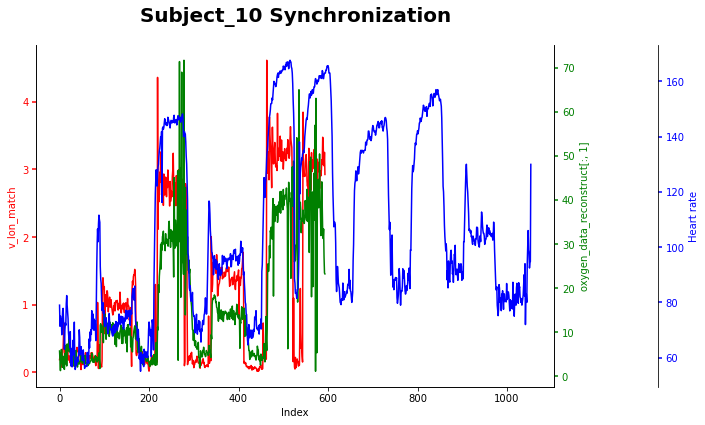

(594,)
(594,)
(594,)
     Longitudinal_Velocity  Heart_Rate     Oxygen
0                 0.187607   79.000000   5.700000
1                 0.229428   71.373295   3.472727
2                 0.251281   75.000000   1.245455
3                 0.289098   72.036914   4.500000
4                 0.076966   73.812668   6.050000
..                     ...         ...        ...
589               3.430373  161.000000  31.233333
590               3.090409  161.000000  33.400002
591               3.053423  162.298429  27.033334
592               3.253626  162.883598  23.400000
593               2.926365  163.005277  23.200001

[594 rows x 3 columns]


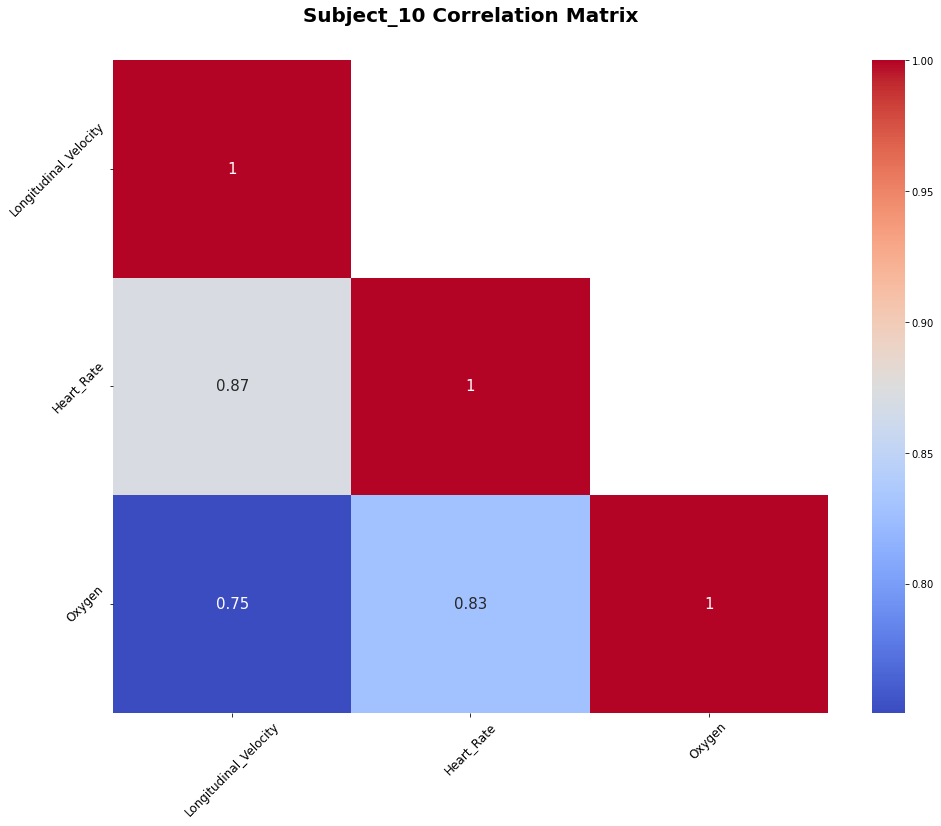

In [56]:
import seaborn as sns

## SUBJECT 1, STACK 3 PARTS INTO 1
if subjectID==0:
    v_lon_match=np.concatenate([v_lon_match_1,v_lon_match_2,v_lon_match_3])
    HR_final=np.concatenate([HR_final_1,HR_final_2,HR_final_3])
    oxygen_sampling=np.concatenate([oxygen_sampling_1,oxygen_sampling_2,oxygen_sampling_3])

## SUBJECT 10, STACK 3 PARTS INTO 1
if subjectID==9:
    v_lon_match=np.concatenate([v_lon_match_1,v_lon_match_2])
    HR_final=np.concatenate([HR_final_1,HR_final_2])
    oxygen_sampling=np.concatenate([oxygen_sampling_1,oxygen_sampling_2])
# else:
#     HR_final=HR_final
# plot_3_data(v_lon_match,HR_final,oxygen_sampling)
min_len=min(len(v_lon_match),len(oxygen_sampling),len(HR_final))
v_lon_match=v_lon_match[:min_len].squeeze()
oxygen_sampling=oxygen_sampling[:min_len]
HR_final=HR_final[:min_len]

print(np.shape(v_lon_match))
print(np.shape(oxygen_sampling))
print(np.shape(HR_final))

data_frame=pd.DataFrame({"Longitudinal_Velocity":v_lon_match,"Heart_Rate":HR_final,"Oxygen":oxygen_sampling})
print(data_frame)

columns_of_interest = ['Longitudinal_Velocity','Heart_Rate','Oxygen' ]
subset_df = data_frame[columns_of_interest]
correlation_matrix = subset_df.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool),k=1)
ax=sns.heatmap(correlation_matrix, mask=mask,annot=True, cmap='coolwarm', annot_kws={'size': 15})
ax.figure.axes[-1].yaxis.label.set_size(12)

plt.xticks(fontsize=12,rotation=45)
plt.yticks(fontsize=12,rotation=45)
plt.title(f"Subject_{subjectID+1} Correlation Matrix",size=20,loc="center",fontdict={'weight': 'bold'},y=1.05)
fig = plt.gcf()
fig.set_size_inches(16, 12)

plt.savefig(figCorrName)
plt.show()

## Save figure

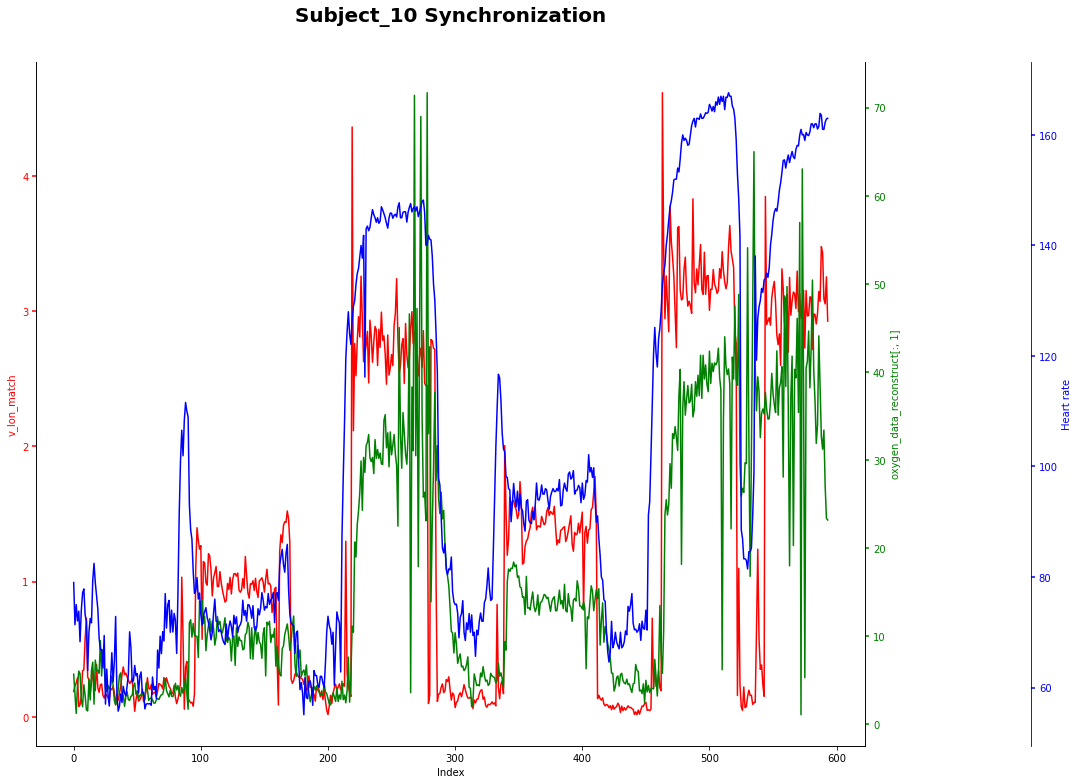

In [58]:
plot_3_data(v_lon_match,HR_final,oxygen_sampling,True,syncFigName=figSyncName)

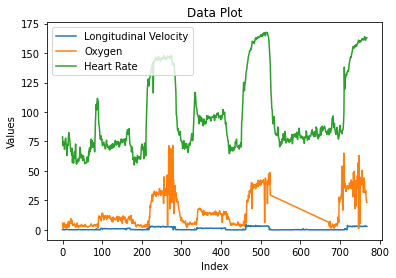

In [21]:
x = data_frame.index  # Assuming the index is suitable for the x-axis
y1 = data_frame['Longitudinal_Velocity']
y2 = data_frame['Oxygen']
y3 = data_frame['Heart_Rate']
plt.plot(x, y1, label='Longitudinal Velocity')
plt.plot(x, y2, label='Oxygen')
plt.plot(x, y3, label='Heart Rate')
plt.title('Data Plot')
plt.xlabel('Index')
plt.ylabel('Values')

# Show legend
plt.legend()

# Display the plot
plt.show()

## Calculate steps then speed, speed change, step duration and vertical oscillation distance amplitude

AttributeError: module 'scipy' has no attribute 'signal'

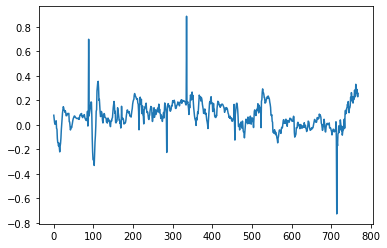

In [22]:
import scipy

min_len=min(len(v_lon_match),len(oxygen_sampling),len(HR_sampling))
v_lon_match=v_lon_match[:min_len]
oxygen_sampling=oxygen_sampling[:min_len]
HR_sampling=HR_sampling[:min_len]


windowStart = 1
windowEnd = len(v_d_match)

vertVel = v_d_match[windowStart - 1:windowEnd]
plt.plot(vertVel)

# KHOA NOTE: Remove Detrend
vertVel_d = scipy.signal.detrend(vertVel)
vertVel_d = vertVel
# print(np.isnan(vertVel_d).any())
maxV = np.max(vertVel_d)
thresh = 0.05 * maxV
a = False
b = False
front = 0
back = 0


cwi = 0
print("Size vertVel_d:")
print(vertVel_d.shape)
print("threshold:")
print(thresh)
while True:
    cwi += 1
    if cwi == 50:
        print('Detrending terminated after 50 iterations. Apparently stuck in local optima.')
        break
#     print(vertVel_d[0])
#     print(vertVel_d[1])
    if np.abs(vertVel_d[0]) > thresh or vertVel_d[0] > vertVel_d[1]:
        vertVel_d = vertVel_d[2:]
        vertVel_d = vertVel_d - np.mean(vertVel_d)
        front += 2
        a = False
    else:
        a = True
    if vertVel_d[-1] > thresh or vertVel_d[0] > vertVel_d[1]:
        vertVel_d = vertVel_d[:-3]
        vertVel_d = vertVel_d - np.mean(vertVel_d)
        back += 3
        a = False
        b = False
    else:
        b = True
    if a and b:
        break
print("Front:")
print(front)
print("Back:")
print(back)

v_lon = v_lon[windowStart + front-1 : windowEnd - back]
v_d = v_d[windowStart + front-1 : windowEnd - back]
windowEnd_r =np.arange(front-1,windowEnd)
back_r = back

steps = []
if vertVel_d[0] > 0:
    steps.append(1)

count = 0
for i in range(len(vertVel_d) - 1):
    if vertVel_d[i] < 0 and vertVel_d[i + 1] > 0:
        count += 1
        steps.append(i + 1)
print('Count: ')
print(count)
print('Length Steps')
print(len(steps))

stepCount = len(steps) - 1
print("Step count:")
print(stepCount)


# plt.plot(vertVel)
# plt.plot(vertVel_d)

In [ ]:
import scipy

vertVel_d=scipy.signal.detrend(vertVel)
plt.plot(vertVel_d)
maxV = np.max(vertVel_d)
thresh = 0.05 * maxV
a = False
b = False
front = 0
back = 0


cwi = 0
print("Size vertVel_d:")
print(vertVel_d.shape)
print("threshold:")
print(thresh)
while True:
    cwi += 1
    if cwi == 50:
        print('Detrending terminated after 50 iterations. Apparently stuck in local optima.')
        break
#     print(vertVel_d[0])
#     print(vertVel_d[1])
    if np.abs(vertVel_d[0]) > thresh or vertVel_d[0] > vertVel_d[1]:
        vertVel_d = vertVel_d[2:]
        vertVel_d = vertVel_d - np.mean(vertVel_d)
        front += 2
        a = False
    else:
        a = True
    if vertVel_d[-1] > thresh or vertVel_d[0] > vertVel_d[1]:
        vertVel_d = vertVel_d[:-3]
        vertVel_d = vertVel_d - np.mean(vertVel_d)
        back += 3
        a = False
        b = False
    else:
        b = True
    if a and b:
        break
print("Front:")
print(front)
print("Back:")
print(back)

v_lon = v_lon[windowStart + front-1 : windowEnd - back]
v_d = v_d[windowStart + front-1 : windowEnd - back]
windowEnd_r =np.arange(front-1,windowEnd)
back_r = back

steps = []
if vertVel_d[0] > 0:
    steps.append(1)

count = 0
for i in range(len(vertVel_d) - 1):
    if vertVel_d[i] < 0 and vertVel_d[i + 1] > 0:
        count += 1
        steps.append(i + 1)
print('Count: ')
print(count)
print('Length Steps')
print(len(steps))

stepCount = len(steps) - 1
print("Step count:")
print(stepCount)

In [ ]:
vertVel_d=scipy.signal.detrend(vertVel_d)
plt.plot(vertVel_d)

## Calculate correlation

In [ ]:


# print(np.shape(v_lon_match))
# print(np.shape(oxygen_sampling))
# print(np.shape(HR_sampling))

data_frame=pd.DataFrame({"Longitudinal_Velocity":v_lon_match,"Oxygen":oxygen_sampling,"Heart_Rate":HR_sampling})
print(data_frame)

## Plot 2 outlined points

In [ ]:
a=resStack[:,0:2]
b=a[abs(a[:,0]-a[:,1])>20]
print(b)
diff=b[:,0]-b[:,1]
print(diff)
c=np.mean([b[:,0],b[:,1]],axis=0)
print(c)

plt.figure(figsize=(3,2.8))
#plt.subplot(2,1,1)
plt.scatter(c[0],diff[0],color="green")
#plt.xlim(18.5,19)
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)

plt.gca().spines['right'].set_linewidth(2)
plt.gca().spines['left'].set_linewidth(2)
plt.gca().spines['top'].set_linewidth(2)
plt.gca().spines['bottom'].set_linewidth(2)

plt.yticks(fontsize=15)
plt.xticks(fontsize=15)


fig = plt.gcf()
fig.savefig('dots1'+'.jpg',bbox_inches='tight')
#plt.subplot(2,1,2)
plt.show()



In [ ]:
plt.figure(figsize=(3.0,2.8))
plt.scatter(c[1],diff[1],color="orange")
#plt.xlim(15,25)
#plt.ylim(-25,-30)
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)

plt.gca().spines['right'].set_linewidth(2)
plt.gca().spines['left'].set_linewidth(2)
plt.gca().spines['top'].set_linewidth(2)
plt.gca().spines['bottom'].set_linewidth(2)

plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

fig = plt.gcf()
fig.savefig('dots2'+'.jpg',bbox_inches='tight')
plt.show()

## Save the final figure

In [ ]:
from PIL import Image, ImageDraw, ImageFilter
bigIm=Image.open('BlandAltman_all_subjects.jpg')
dot1=Image.open('dots1.jpg')
dot2=Image.open('dots2.jpg')

back_im = bigIm.copy()
back_im.paste(dot1,(180,750))
back_im.paste(dot2,(180,150))
#back_im.show()
back_im.save('final.jpg',qualit=95)

## References plot from built-in library

In [ ]:
import statsmodels.api as sm
f, ax = plt.subplots(1, figsize = (8,5))
sm.graphics.mean_diff_plot(VO2_hat,VO2,ax=ax)
plt.show()
#print(mean)